# Count violations

Show the violations of a spec. Use this to investigate the features we use for learning of a visualization.

In [3]:
from draco.spec import Data, Task, Query
from draco.learn.helper import count_violations, compute_cost
import pandas as pd
from vega3 import VegaLite
from pprint import pprint

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARN)

In [4]:
true = True
false = False

In [11]:
data_url = '../data/cars.json'
data = Data.from_json(data_url)

spec1 = {
    "encoding": {
        "color": {
            "field": "Cylinders",
            "scale": {
                "zero": true
            },
            "type": "quantitative"
        },
        "x": {
            "bin": {
                "maxbins": 10
            },
            "field": "Horsepower",
            "scale": {
                "zero": false
            },
            "type": "quantitative"
        },
        "y": {
            "field": "Displacement",
            "scale": {
                "zero": true
            },
            "type": "quantitative"
        }
    },
    "mark": "tick"
}

spec2 = {
    "encoding": {
        "x": {
            "bin": {
                "maxbins": 10
            },
            "field": "Horsepower",
            "scale": {
                "zero": false
            },
            "type": "quantitative"
        },
        "y": {
            "scale": {
                "zero": true
            },
            "aggregate": "count",
            "type": "quantitative"
        }
    },
    "mark": "bar"
}

In [12]:
values = pd.DataFrame(data.content)

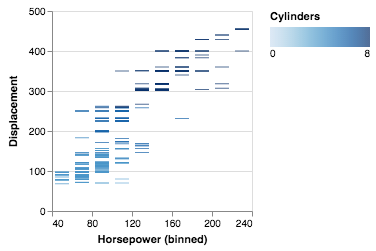

In [13]:
VegaLite(spec1, values)

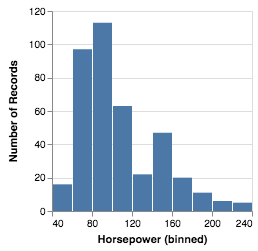

In [14]:
VegaLite(spec2, values)

In [15]:
def print_violations(spec):
    task = Task(data, Query.from_vegalite(spec))
    violations = count_violations(task)
    print(compute_cost(violations))
    pprint(violations)
    print()
    
print('First:')
print_violations(spec1)

print('Second:')
print_violations(spec2)

First:
45
{'bin': 1,
 'c_d_tick': 1,
 'continuous_color': 1,
 'continuous_y': 1,
 'encoding': 3,
 'encoding_field': 3,
 'horizontal_scrolling': 1,
 'ordered_x': 1,
 'type_q': 3}

Second:
33
{'aggregate': 1,
 'aggregate_count': 1,
 'bin': 1,
 'c_d_no_overlap_bar': 1,
 'continuous_y': 1,
 'encoding': 2,
 'encoding_field': 1,
 'horizontal_scrolling': 1,
 'ordered_x': 1,
 'type_q': 2}

